# Creation of Test Data Set

In [1]:
# We temporarily disable warnings for demonstration.
# FutureWarnings and DeprecationWarnings are present from some of the AMPL dependency modules.
import warnings
warnings.filterwarnings('ignore')
import json
import requests

In [2]:
# install items that need to be installed 

! pip install rdkit-pypi
! pip install deepchem

import deepchem
# print(deepchem.__version__)
! pip install umap
! pip install -U --ignore-installed numba
! pip install umap-learn
! pip install molvs
! pip install bravado

2024-05-07 13:04:16.269435: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 13:04:16.328714: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 13:04:16.328775: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 13:04:16.328814: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-07 13:04:16.340454: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 13:04:16.342354: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

  Using cached numba-0.59.1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached llvmlite-0.42.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numba-0.59.1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
Using cached llvmlite-0.42.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.8 MB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.8.1 requires numpy<1.25.0,>=1.17.3, but you have numpy 1.26.4 which is incompatible.
ydata-profiling 4.6.4 requires numba<0.59.0,>=0.56.0, but you have numba 0.59.1 which is incompatible.
ydata-profiling 4.6.4 req

In [3]:
#
# Import AMPL libraries
# 

import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd

# Additional python libraries
import pandas as pd
import numpy as np
import getpass,os

In [4]:
# Current working directory 
import os
current_directory = os.getcwd()
print("Current working directory:", current_directory)
# List files and directories in the current working directory
files_and_directories = os.listdir(current_directory)
print("Files and directories in the current working directory:", files_and_directories)

Current working directory: /home/jupyter/hERG_Analysis
Files and directories in the current working directory: ['herg_chembl_curated_train_valid_test_fingerprint_64ffab14-47a7-44e8-bfa1-8576f640e241.csv', 'herg_chembl_curated.csv', 'herg_chembl_curated_train_valid_test_scaffold_5f834022-46ac-4c7b-bca1-9573f6eb940f.csv', 'herg_chembl.csv', 'herg_central_curated.csv', 'scaled_descriptors', 'herg_central.csv', 'Data Curation.ipynb', 'Compare Models.ipynb', 'Hyperparameter Optimization.ipynb', 'herg_chembl_curated_train_valid_test_random_ac01fe91-0793-4566-9340-2ff90e6a58c5.csv', 'Test Data.ipynb', 'Production Model.ipynb', 'herg_chembl_curated', '.ipynb_checkpoints', 'TestPlotFunctionality.ipynb', 'herg_chembl_curated_model_d2a56cc1-895d-4062-9f7b-8e7a9ff053f1.tar.gz', 'ApplicationOfModel.ipynb', 'Models', 'Basic_Model.ipynb', 'herg_curated.csv']


In [5]:
import pandas as pd

# Reading the downloaded content and turning it into a pandas dataframe
herg_central = pd.read_csv('herg_central.csv',header=0)
herg_central.head(3)

,ID,X,hERG_at_1uM,hERG_at_10uM,hERG_inhib
0,22416348,Cc1occc1C(=O)NCc1ccco1,20.17528,30.99165,0.0
1,26665387,COc1ccc(/C=C2\SC(=S)N(N3CCOCC3)C2=O)c(OC)c1,10.22630,13.05888,0.0
2,862531,C[C@H](NC(=O)Nc1cccc(C(F)(F)F)c1)C(=O)O,2.04420,0.06288,0.0


In [6]:
herg_central = herg_central.rename(columns={"X": "smiles"})
herg_central

,ID,smiles,hERG_at_1uM,hERG_at_10uM,hERG_inhib
0,22416348,Cc1occc1C(=O)NCc1ccco1,20.17528,30.99165,0.0
1,26665387,COc1ccc(/C=C2\SC(=S)N(N3CCOCC3)C2=O)c(OC)c1,10.22630,13.05888,0.0
2,862531,C[C@H](NC(=O)Nc1cccc(C(F)(F)F)c1)C(=O)O,2.04420,0.06288,0.0
3,26732361,COc1cc(OC)c2ccc(=O)oc2c1C(CC(=O)N1CCOCC1)c1ccc...,21.80250,17.87858,0.0
4,49735227,COc1cccc(NC(=O)C2C3C=CC4(O3)C2C(=O)N(CCCN2CCCC...,8.33980,19.03128,0.0
...,...,...,...,...,...
153742,14723108,CCN(CC)C(=O)c1ccc(S(=O)(=O)NCc2cccnc2)cc1,14.29750,13.86718,0.0
153743,24813265,CCN1C(=O)/C(=C2/C=Cc3ccccc3N2CC)SC1=S,5.20200,10.96288,0.0
153744,47204498,COc1ccc(C2CC(=O)Nc3cc(OC)c(OC)cc32)cc1Br,12.87620,11.88718,0.0
153745,14746971,CCOC(=O)c1cc(-c2ccccc2)nc2c1c(C)nn2-c1ccccn1,4.41660,-6.42122,0.0


In [7]:
# show number of rows in data frame and number of columns
print(herg_central.shape)

# show column names
display(herg_central.columns)

# get more high level view of data 
herg_central.describe()

(153747, 5)


Index(['ID', 'smiles', 'hERG_at_1uM', 'hERG_at_10uM', 'hERG_inhib'], dtype='object')

,ID,hERG_at_1uM,hERG_at_10uM,hERG_inhib
count,1.537470e+05,153746.000000,153746.000000,153746.000000
mean,2.810902e+07,6.222035,-2.790548,0.044899
std,1.809881e+07,11.208379,20.581156,0.207082
min,8.421210e+05,-299.017000,-284.172920,0.000000
25%,1.474219e+07,2.772025,-10.257920,0.000000
50%,2.480554e+07,8.228050,1.658280,0.000000
75%,4.966718e+07,12.419150,10.505105,0.000000
max,8.514922e+07,126.489200,213.104180,1.000000


## Standard SMILES

In [10]:
from atomsci.ddm.utils import struct_utils
from atomsci.ddm.utils.struct_utils import base_smiles_from_smiles

herg_central['rdkit_smiles'] = herg_central['smiles'].apply(curate_data.base_smiles_from_smiles)
herg_central['inchi_key'] = herg_central['smiles'].apply(struct_utils.smiles_to_inchi_key)

In [12]:
herg_central.smiles.nunique(), herg_central.rdkit_smiles.nunique()

(153745, 153704)

In [13]:
herg_central.head(5)

,ID,smiles,hERG_at_1uM,hERG_at_10uM,hERG_inhib,rdkit_smiles,inchi_key
0,22416348,Cc1occc1C(=O)NCc1ccco1,20.17528,30.99165,0.0,Cc1occc1C(=O)NCc1ccco1,ZSEHNDARAQYZIE-UHFFFAOYSA-N
1,26665387,COc1ccc(/C=C2\SC(=S)N(N3CCOCC3)C2=O)c(OC)c1,10.22630,13.05888,0.0,COc1ccc(/C=C2\SC(=S)N(N3CCOCC3)C2=O)c(OC)c1,SYQWJOODSYJNNZ-ZROIWOOFSA-N
2,862531,C[C@H](NC(=O)Nc1cccc(C(F)(F)F)c1)C(=O)O,2.04420,0.06288,0.0,C[C@H](NC(=O)Nc1cccc(C(F)(F)F)c1)C(=O)O,DGYIEAKKNIJZMZ-LURJTMIESA-N
3,26732361,COc1cc(OC)c2ccc(=O)oc2c1C(CC(=O)N1CCOCC1)c1ccc...,21.80250,17.87858,0.0,COc1cc(OC)c2ccc(=O)oc2c1C(CC(=O)N1CCOCC1)c1ccc...,FTBAUYNAXYJVGK-UHFFFAOYSA-N
4,49735227,COc1cccc(NC(=O)C2C3C=CC4(O3)C2C(=O)N(CCCN2CCCC...,8.33980,19.03128,0.0,COc1cccc(NC(=O)C2C3C=CC4(O3)C2C(=O)N(CCCN2CCCC...,IOOKOVSIRAEBPQ-UHFFFAOYSA-N


In [14]:
# change column name from inchi_key to compound_id
herg_central.rename(columns={ "inchi_key" : "compound_id"}, inplace=True)
herg_central = herg_central.drop('smiles',axis=1)
herg_central.head()

,ID,hERG_at_1uM,hERG_at_10uM,hERG_inhib,rdkit_smiles,compound_id
0,22416348,20.17528,30.99165,0.0,Cc1occc1C(=O)NCc1ccco1,ZSEHNDARAQYZIE-UHFFFAOYSA-N
1,26665387,10.22630,13.05888,0.0,COc1ccc(/C=C2\SC(=S)N(N3CCOCC3)C2=O)c(OC)c1,SYQWJOODSYJNNZ-ZROIWOOFSA-N
2,862531,2.04420,0.06288,0.0,C[C@H](NC(=O)Nc1cccc(C(F)(F)F)c1)C(=O)O,DGYIEAKKNIJZMZ-LURJTMIESA-N
3,26732361,21.80250,17.87858,0.0,COc1cc(OC)c2ccc(=O)oc2c1C(CC(=O)N1CCOCC1)c1ccc...,FTBAUYNAXYJVGK-UHFFFAOYSA-N
4,49735227,8.33980,19.03128,0.0,COc1cccc(NC(=O)C2C3C=CC4(O3)C2C(=O)N(CCCN2CCCC...,IOOKOVSIRAEBPQ-UHFFFAOYSA-N


Post-processing dataset

Total Number of results = 153747
dataset mean = 0.04489872907262628 number
dataset stdev = 0.20708238003774262 number
dataset max = 1.0 number
dataset min = 0.0 number



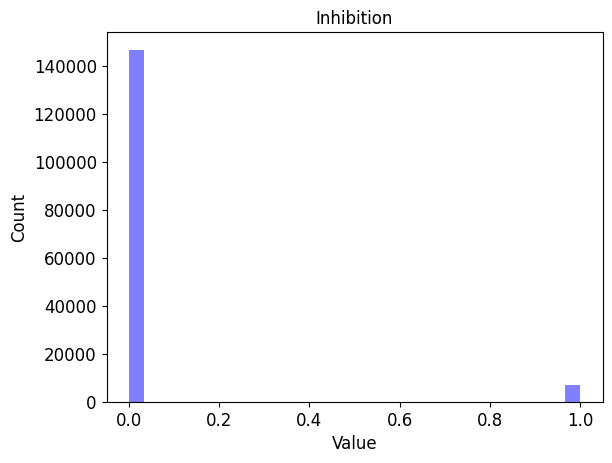

In [15]:
# Our outcome is MW
column = 'hERG_inhib'

# num_bins wil decide how many bins for creating histogram plot
num_bins = 30

# Ue the target_name as the title for the plot 
title = 'Inhibition'

# Outcome data units (nanomolar = nm = $1 x 10^-9$ M )
units = 'number'

# filepath, in this case, current dir
filepath = ""

# dataset with smiles 
data=herg_central

# call AMPL function (mouse over the function call and view source to see the code)
# The curate_data.summarize_data will summarize the data 
# output will be: 
# Total Number of results (data rows)
#   dataset mean: (mean of Molecular Weight)
#   dataset stdev: (sd of Molecular Weight)
#   dataset max: max value of data
#   dataset min: min value of data
curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [16]:
import pandas as pd
herg_central.to_csv('herg_central_curated.csv', index=False)